In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [412]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/IOC.csv")

In [413]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


In [414]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [415]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,318.613362,319.216953,324.743121,313.357755,318.606587,318.582614,319.105030,3.188201e+06,5.934325e+13,40210.116042,1.454141e+06,0.489827
std,138.314392,138.656893,141.451787,135.786900,138.322192,138.346890,138.689811,7.692790e+06,1.070842e+14,36408.355567,3.658331e+06,0.159908
min,71.550000,72.350000,73.400000,71.150000,71.500000,71.550000,72.560000,3.500000e+02,5.222700e+09,308.000000,2.176000e+03,0.066700
25%,199.850000,200.000000,202.000000,197.700000,199.750000,199.850000,199.862500,1.922215e+05,7.022101e+12,11643.250000,1.335970e+05,0.371900
50%,332.250000,332.000000,338.000000,326.050000,332.000000,332.250000,331.810000,5.624070e+05,2.066347e+13,30419.000000,2.997460e+05,0.484500
75%,418.950000,419.575000,426.975000,412.187500,418.950000,418.950000,419.917500,1.881595e+06,7.000699e+13,59112.000000,1.203898e+06,0.595700
max,794.950000,800.000000,810.000000,775.550000,793.000000,794.950000,789.830000,2.099291e+08,2.868430e+15,379888.000000,1.393454e+08,0.988900


In [416]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [417]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [418]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [419]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [420]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [421]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [422]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.196581,-0.563698,88.20,7066681,NaN
5302,1.020408,0.736961,88.85,8752415,NaN
5303,0.617978,0.224215,89.40,6336704,NaN
5304,2.029312,-1.495845,88.90,8957163,NaN
5305,5.795455,2.539503,90.85,29815698,NaN


In [423]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [424]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [425]:
#Define the prediction model
model = RandomForestRegressor()

In [426]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [427]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8705547891822472


In [428]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [429]:
predictions = model.predict(X_Check)

In [430]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

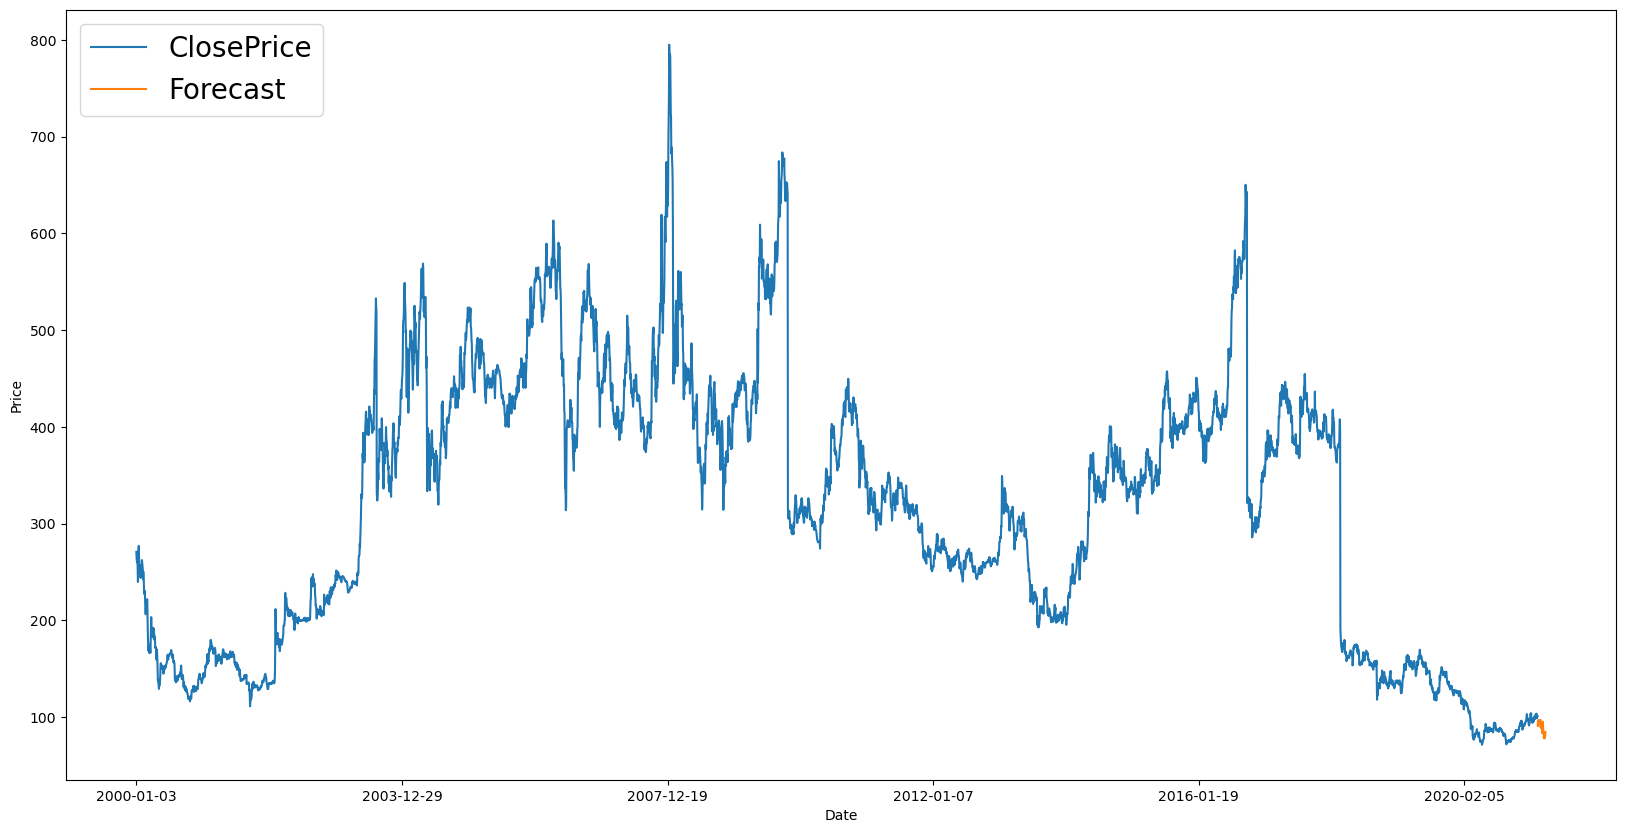

In [431]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')